#BANKNOTE RECOGNITION FOR AUTOMATED VENDING MACHINES

#Importing Libraries

In [2]:
#!pip install keras
#!pip install tensorflow
#! pip install tensorflow_hub

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import os
import random
import shutil

# Importing Library for Data Visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Importing Tensorflow for model creation and its dependencies
import tensorflow as tf
import tensorflow_hub as hub # for the pretrained model
from tensorflow import keras

# for enabling inline plotting
%matplotlib inline

In [ ]:
#uncomment to load dataset from google drive
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

# Data Preprocessing & EDA

## Specifying directory path for Renaming

In [4]:

# Specify the directory path for P10
directory = '/content/drive/MyDrive/Banknote_Rec/BANKNOTES2/p10'

# Iterate through P10 files and rename them
for count, filename in enumerate(os.listdir(directory)):
    new_name = f'P10_{count+1}.jpg'  # Adjust the naming convention as needed
    source = os.path.join(directory, filename)
    destination = os.path.join (directory, new_name)
    os.rename(source, destination)


In [5]:
# Specify the directory path for P20
directory = '/content/drive/MyDrive/Banknote_Rec/BANKNOTES2/p20'

# Iterate through P20 files and rename them
for count, filename in enumerate(os.listdir(directory)):
    new_name = f'P20_{count+1}.jpg'  # Adjust the naming convention as needed
    source = os.path.join(directory, filename)
    destination = os.path.join(directory, new_name)
    os.rename(source, destination)

In [6]:
# Specify the directory path for P50
directory = '/content/drive/MyDrive/Banknote_Rec/BANKNOTES2/p50'

# Iterate through P50 files and rename them
for count, filename in enumerate(os.listdir(directory)):
    new_name = f'P50_{count+1}.jpg'  # Adjust the naming convention as needed
    source = os.path.join(directory, filename)
    destination = os.path.join(directory, new_name)
    os.rename(source, destination)

In [7]:
# Specify the directory path for P100
directory = '/content/drive/MyDrive/Banknote_Rec/BANKNOTES2/p100'

# Iterate through P100 files and rename them
for count, filename in enumerate(os.listdir(directory)):
    new_name = f'P100_{count+1}.jpg'  # Adjust the naming convention as needed
    source = os.path.join(directory, filename)
    destination = os.path.join(directory, new_name)
    os.rename(source, destination)

In [8]:
# Specify the directory path for P200
directory = '/content/drive/MyDrive/Banknote_Rec/BANKNOTES2/p200'

# Iterate through P200 files and rename them
for count, filename in enumerate(os.listdir(directory)):
    new_name = f'P200_{count+1}.jpg'  # Adjust the naming convention as needed
    source = os.path.join(directory, filename)
    destination = os.path.join(directory, new_name)
    os.rename(source, destination)

##Splitting data

In [9]:

# Set the path to the root directory containing denomination folders
root_dir = '/content/drive/MyDrive/Banknote_Rec/BANKNOTES2'

# Set the path to the directory where you want to save the split datasets
output_dir = '/content/drive/MyDrive/Banknote_Rec/split_datasets2'

# Set the random seed for reproducibility
random_seed = 42
random.seed(random_seed)

# Set the ratio for train, test, and validation sets
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

# Create output directories for train, test, and validation sets
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
val_dir = os.path.join(output_dir, 'val')

#uncomment to perform iteration for splitting dataset
'''for directory in [train_dir, test_dir, val_dir]:
    os.makedirs(directory, exist_ok=True)

# Iterate through each denomination folder
for denomination_folder in os.listdir(root_dir):
    denomination_path = os.path.join(root_dir, denomination_folder)

    # Skip if not a directory
    if not os.path.isdir(denomination_path):
        continue

    # Create subdirectories within train, test, and val for each denomination
    for subdirectory in ['train', 'test', 'val']:
        sub_dir = os.path.join(output_dir, subdirectory, denomination_folder)
        os.makedirs(sub_dir, exist_ok=True)

    # Get the list of images for the current denomination
    images = os.listdir(denomination_path)

    # Shuffle the images for randomness
    random.shuffle(images)

    # Calculate the split indices
    train_split = int(train_ratio * len(images))
    test_split = int(test_ratio * len(images)) + train_split

    # Split the images into train, test, and validation sets
    train_images = images[:train_split]
    test_images = images[train_split:test_split]
    val_images = images[test_split:]

    # Copy images to the corresponding split folders
    for image in train_images:
        src = os.path.join(denomination_path, image)
        dst = os.path.join(train_dir, denomination_folder, image)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(denomination_path, image)
        dst = os.path.join(test_dir, denomination_folder, image)
        shutil.copy(src, dst)

    for image in val_images:
        src = os.path.join(denomination_path, image)
        dst = os.path.join(val_dir, denomination_folder, image)
        shutil.copy(src, dst)

print("Dataset split and organized into train, test, and val folders.")'''


'for directory in [train_dir, test_dir, val_dir]:\n    os.makedirs(directory, exist_ok=True)\n\n# Iterate through each denomination folder\nfor denomination_folder in os.listdir(root_dir):\n    denomination_path = os.path.join(root_dir, denomination_folder)\n\n    # Skip if not a directory\n    if not os.path.isdir(denomination_path):\n        continue\n\n    # Create subdirectories within train, test, and val for each denomination\n    for subdirectory in [\'train\', \'test\', \'val\']:\n        sub_dir = os.path.join(output_dir, subdirectory, denomination_folder)\n        os.makedirs(sub_dir, exist_ok=True)\n\n    # Get the list of images for the current denomination\n    images = os.listdir(denomination_path)\n\n    # Shuffle the images for randomness\n    random.shuffle(images)\n\n    # Calculate the split indices\n    train_split = int(train_ratio * len(images))\n    test_split = int(test_ratio * len(images)) + train_split\n\n    # Split the images into train, test, and validation

## Augmentation & Transformation

In [10]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Set the path to the root directory containing denomination folders
root_dir = '/content/drive/MyDrive/Banknote_Rec/split_datasets2/train'

# Create an instance of the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  #normlalisation of images
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range = (0.5, 1.5),
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255) #normlalisation of images

#uncomment to Augment images in trainset
# Iterate through each denomination folder
'''for denomination_folder in os.listdir(root_dir):
    denomination_path = os.path.join(root_dir, denomination_folder)

    # Skip if not a directory
    if not os.path.isdir(denomination_path):
        continue

    # Iterate through each image in the current denomination
    for image_name in os.listdir(denomination_path):
        image_path = os.path.join(denomination_path, image_name)

        # Load and transform the image
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate and save augmented images under the same path
        i = 0
        for batch in train_datagen.flow(x, batch_size=1, save_to_dir=denomination_path, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= 70:  # Generate and save 70 augmented images per original image
                break'''





"for denomination_folder in os.listdir(root_dir):\n    denomination_path = os.path.join(root_dir, denomination_folder)\n\n    # Skip if not a directory\n    if not os.path.isdir(denomination_path):\n        continue\n\n    # Iterate through each image in the current denomination\n    for image_name in os.listdir(denomination_path):\n        image_path = os.path.join(denomination_path, image_name)\n\n        # Load and transform the image\n        img = image.load_img(image_path, target_size=(224, 224))\n        x = image.img_to_array(img)\n        x = x.reshape((1,) + x.shape)\n\n        # Generate and save augmented images under the same path\n        i = 0\n        for batch in train_datagen.flow(x, batch_size=1, save_to_dir=denomination_path, save_prefix='aug', save_format='jpeg'):\n            i += 1\n            if i >= 70:  # Generate and save 70 augmented images per original image\n                break"

###sampling augmented image



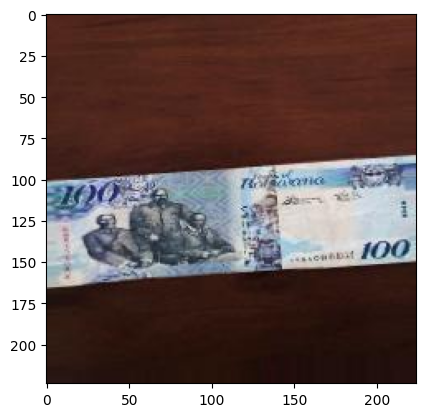

In [11]:
# sampling augmented images for visualization
sample_augmented_image_path = os.path.join(output_dir, '/content/drive/MyDrive/Banknote_Rec/split_datasets2/train/p100/aug_0_3241.jpeg')
img = image.load_img(sample_augmented_image_path)
plt.imshow(img)
plt.show()

## Generating Number of images per set and number of classes

In [13]:
# Set the paths for train, test, val
TrainPath = '/content/drive/MyDrive/Banknote_Rec/split_datasets2/train'
TestPath = '/content/drive/MyDrive/Banknote_Rec/split_datasets2/test'
ValPath = '/content/drive/MyDrive/Banknote_Rec/split_datasets2/val'

# Specify the target size and batch size
target_size = (224, 224)  #for MobileNetv2
batch_size = 32 #adjusting by powers of 2

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
    TrainPath,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=[d for d in os.listdir(TrainPath) if os.path.isdir(os.path.join(TrainPath, d)) and d != '.ipynb_checkpoints']
)

# Generating the Testing Data
testing_set = test_datagen.flow_from_directory(
    TestPath,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=[d for d in os.listdir(TestPath) if os.path.isdir(os.path.join(TestPath, d)) and d != '.ipynb_checkpoints']
)

# Generating the Validating Data
validation_set = test_datagen.flow_from_directory(
    ValPath,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=[d for d in os.listdir(ValPath) if os.path.isdir(os.path.join(ValPath, d)) and d != '.ipynb_checkpoints']
)


Found 11017 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [14]:
training_set[1][1].shape


(32, 5)

## Image data reading

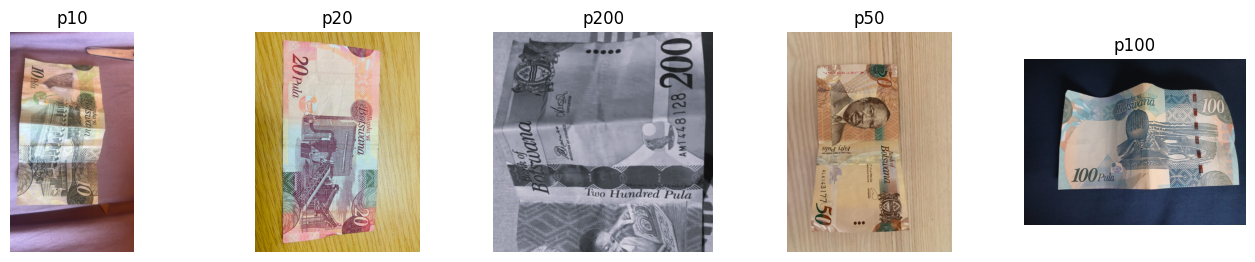

In [15]:
# Function to plot any random image from the dataset
def showImages(class_name):
    folder_path = os.path.join(TrainPath, class_name)

    try:
        # Get a list of all image files in the folder
        image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

        # Choose a random image file
        random_image_file = random.choice(image_files)

        # Construct the full path to the image
        image_path = os.path.join(folder_path, random_image_file)

        # Load and display the image
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')  # Turn off the axis
    except Exception as e:
        print(f"Error loading image for {class_name}: {e}")

# Create a subplot for each class
plt.figure(figsize=(20, 20))
for labels, number in training_set.class_indices.items():
    plt.subplot(6, 6, number + 1)
    showImages(labels)
plt.show()


In [13]:
# Printing class labels for each denomination
testing_set.class_indices

{'p10': 0, 'p20': 1, 'p200': 2, 'p50': 3, 'p100': 4}

##Creating lookup table for all denominators

In [16]:
# class_indices have the numeric tag for each denominator
TrainClasses = training_set.class_indices

# Storing the denominator and the numeric tag for future reference
ResultMap = {}
for denomValue, denomName in TrainClasses.items():  # Fix the loop to iterate over items
    ResultMap[denomValue] = denomName

# Saving the face map for future reference
import pickle
file_path = "/content/drive/MyDrive/Banknote_Rec/ResultMap.pkl"
with open(file_path, 'wb') as f:  # Use 'wb' for binary write mode
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of denominator and its ID", ResultMap)

# The number of neurons for the output layer is equal to the number of denominators
OutputNeurons = len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


Mapping of denominator and its ID {'p10': 0, 'p20': 1, 'p200': 2, 'p50': 3, 'p100': 4}

 The Number of output neurons:  5


# Using Pretrained Model for Image Classification




### Model 1



In [ ]:

# saved as classifier1.h5
#uncomment to train 1st model
# Import necessary libraries
'''
from tensorflow.keras import layers, models
import tensorflow_hub as hub

# Load MobileNetV2 model as the base model
MobileNetV2 = tf.keras.applications.MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Create a sequential model
model = models.Sequential()

# Add the MobileNetV2 base model to the sequential model
model.add(base_model)

# Add custom layers on top of MobileNetV2
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())  # Add Batch Normalization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Add Dropout
model.add(layers.Dense(5, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()'''


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [ ]:
history = model.fit(training_set, epochs = 10,
                          validation_data=validation_set)

Epoch 1/10
346/346 [==============================] - 3232s 9s/step - loss: 0.6192 - accuracy: 0.7746 - val_loss: 1.1283 - val_accuracy: 0.5200
Epoch 2/10
346/346 [==============================] - 658s 2s/step - loss: 0.2653 - accuracy: 0.9064 - val_loss: 0.8465 - val_accuracy: 0.6800
Epoch 3/10
346/346 [==============================] - 671s 2s/step - loss: 0.1829 - accuracy: 0.9369 - val_loss: 1.0390 - val_accuracy: 0.7200
Epoch 4/10
346/346 [==============================] - 664s 2s/step - loss: 0.1458 - accuracy: 0.9510 - val_loss: 0.8936 - val_accuracy: 0.8000
Epoch 5/10
346/346 [==============================] - 618s 2s/step - loss: 0.1324 - accuracy: 0.9552 - val_loss: 0.9432 - val_accuracy: 0.6800
Epoch 6/10
346/346 [==============================] - 591s 2s/step - loss: 0.1337 - accuracy: 0.9535 - val_loss: 1.0735 - val_accuracy: 0.7200
Epoch 7/10
346/346 [==============================] - 626s 2s/step - loss: 0.1119 - accuracy: 0.9631 - val_loss: 0.8210 - val_accuracy: 0.800

In [ ]:
# Saving the model
model.save("/content/drive/MyDrive/Banknote_Rec/classifier1.h5")

# You can later load the model using:
# loaded_model = load_model("/content/drive/MyDrive/classifier1.h5")

In [17]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/Banknote_Rec/classifier1.h5"
classifier = load_model(model_path)

test_results = classifier.evaluate(testing_set)

# The 'test_results' variable will contain the loss and accuracy
test_loss, test_accuracy = test_results

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 10s 6s/step - loss: 0.7020 - accuracy: 0.8000
Test Loss: 0.7020143270492554
Test Accuracy: 0.800000011920929


###Visualisation 1

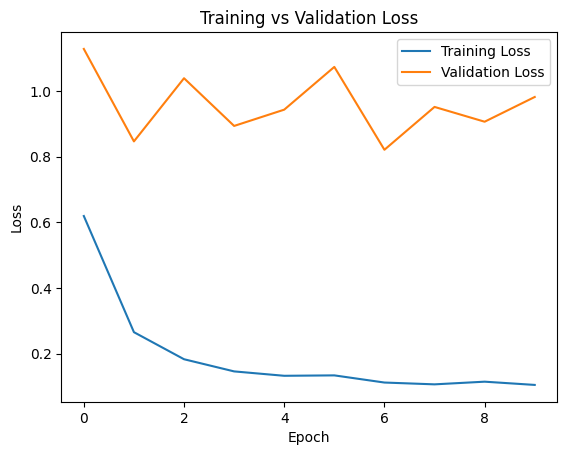

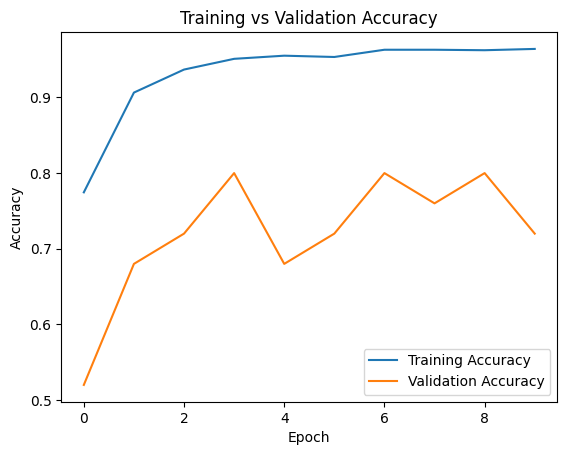

In [ ]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Model evaluation on Unknown data

###Evaluation 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model_path = "/content/drive/MyDrive/Banknote_Rec/classifier1.h5"
classifier = load_model(model_path)

# Reset the testing_set  to the beginning
testing_set.reset()

# Get predictions for the entire test set batch-wise
predictions = []
true_labels = []

for _ in range(testing_set.n // testing_set.batch_size + 1):
    try:
        test_data, test_labels = testing_set.next()
        batch_predictions = classifier.predict(test_data)

        predictions.extend(np.argmax(batch_predictions, axis=1))
        true_labels.extend(np.argmax(test_labels, axis=1))
    except StopIteration:
        break  # Break the loop if the generator is exhausted

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predictions))

1/1 [==============================] - 1s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.90      0.90      0.90        10
           2       0.67      0.80      0.73        10
           3       0.88      0.70      0.78        10
           4       0.78      0.70      0.74        10

    accuracy                           0.80        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.81      0.80      0.80        50

Confusion Matrix:
[[9 0 0 1 0]
 [0 9 1 0 0]
 [0 0 8 0 2]
 [1 0 2 7 0]
 [1 1 1 0 7]]


# Fine Tuning


##Model 2


In [ ]:
# saved as classifier2.h5
#uncomment to train 2nd model
# Import necessary libraries
'''import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping

# Load MobileNetV2 model as the base model
MobileNetV2 = tf.keras.applications.MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Create a sequential model
model = models.Sequential()

# Add the MobileNetV2 base model to the sequential model
model.add(base_model)

# Add custom layers on top of MobileNetV2
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())  # Add Batch Normalization
model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # Increased units and added L2 regularization
model.add(layers.Dropout(0.5))  # Adjusted dropout rate
model.add(layers.Dense(5, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(training_set, epochs=20, validation_data=validation_set, callbacks=[early_stopping])

# Evaluate the model on the test set
test_results = model.evaluate(testing_set)
print("Test Accuracy:", test_results[1])

# Display the model summary
model.summary()'''

Epoch 1/20
346/346 [==============================] - 641s 2s/step - loss: 5.1913 - accuracy: 0.5640 - val_loss: 4.8594 - val_accuracy: 0.5600
Epoch 2/20
346/346 [==============================] - 594s 2s/step - loss: 3.9949 - accuracy: 0.8181 - val_loss: 4.1977 - val_accuracy: 0.6000
Epoch 3/20
346/346 [==============================] - 610s 2s/step - loss: 3.3035 - accuracy: 0.8799 - val_loss: 3.5185 - val_accuracy: 0.6400
Epoch 4/20
346/346 [==============================] - 589s 2s/step - loss: 2.7241 - accuracy: 0.9128 - val_loss: 3.0450 - val_accuracy: 0.7200
Epoch 5/20
346/346 [==============================] - 593s 2s/step - loss: 2.2305 - accuracy: 0.9279 - val_loss: 2.5916 - val_accuracy: 0.7200
Epoch 6/20
346/346 [==============================] - 594s 2s/step - loss: 1.8137 - accuracy: 0.9410 - val_loss: 2.1600 - val_accuracy: 0.6800
Epoch 7/20
346/346 [==============================] - 615s 2s/step - loss: 1.4735 - accuracy: 0.9494 - val_loss: 1.8226 - val_accuracy: 0.7600

In [ ]:
#saving 2nd model
'''model.save("/content/drive/MyDrive/Banknote_Rec/classifier2.h5")'''


from tensorflow.keras.models import load_model

# Load the saved model
model_path = "/content/drive/MyDrive/Banknote_Rec/classifier2.h5"
classifier = load_model(model_path)

In [18]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/Banknote_Rec/classifier2.h5"
classifier = load_model(model_path)

# Assuming your testing_set is defined
test_results = classifier.evaluate(testing_set)

# The 'test_results' variable will contain the loss and accuracy
test_loss, test_accuracy = test_results

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 4s 565ms/step - loss: 0.6695 - accuracy: 0.7600
Test Loss: 0.6694760322570801
Test Accuracy: 0.7599999904632568


###Visualisation 2

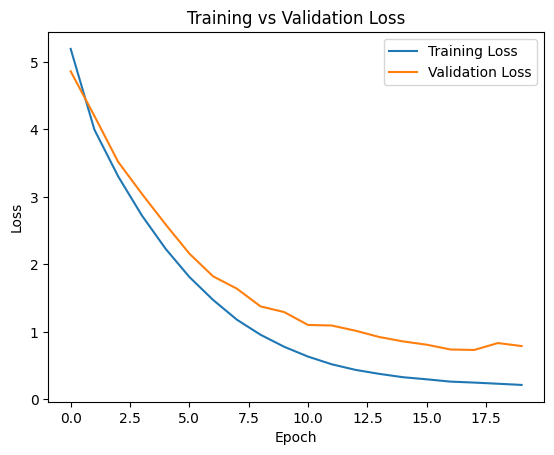

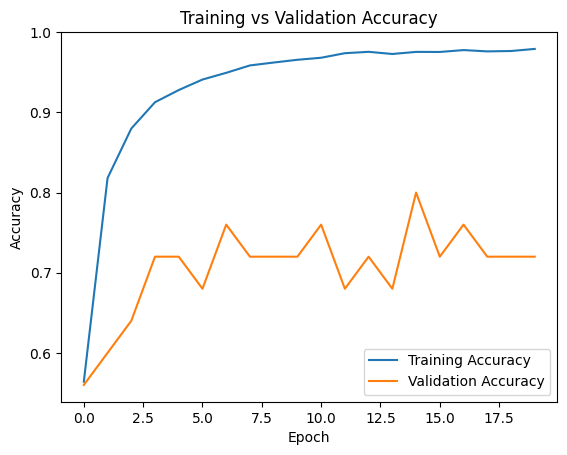

In [ ]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Evaluation2

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Reset the testing_set  to the beginning
testing_set.reset()

# Get predictions for the entire test set batch-wise
predictions = []
true_labels = []

for _ in range(testing_set.n // testing_set.batch_size + 1):
    try:
        test_data, test_labels = testing_set.next()
        batch_predictions = classifier.predict(test_data)

        predictions.extend(np.argmax(batch_predictions, axis=1))
        true_labels.extend(np.argmax(test_labels, axis=1))
    except StopIteration:
        break  # Break the loop if the generator is exhausted

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predictions))


1/1 [==============================] - 1s 895ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.78      0.70      0.74        10
           2       0.73      0.80      0.76        10
           3       0.86      0.60      0.71        10
           4       0.88      0.70      0.78        10

    accuracy                           0.76        50
   macro avg       0.78      0.76      0.76        50
weighted avg       0.78      0.76      0.76        50

Confusion Matrix:
[[10  0  0  0  0]
 [ 1  7  1  1  0]
 [ 1  0  8  0  1]
 [ 1  1  2  6  0]
 [ 2  1  0  0  7]]


##Model 3

In [ ]:
# saved as classifier3.h5
#uncomment to train 3rd model
# Import necessary libraries
'''import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np

# Learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.0001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
    return lr

# Load MobileNetV2 model as the base model
MobileNetV2 = tf.keras.applications.MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Create a sequential model
model = models.Sequential()

# Add the MobileNetV2 base model to the sequential model
model.add(base_model)

# Add custom layers on top of MobileNetV2
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

# Compile the model with a learning rate schedule
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up early stopping and learning rate schedule callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule_callback = LearningRateScheduler(lr_schedule)

# Train the model with early stopping and learning rate schedule
history = model.fit(training_set, epochs=20, validation_data=validation_set, callbacks=[early_stopping, lr_schedule_callback])

# Evaluate the model on the test set
test_results = model.evaluate(testing_set)
print("Test Accuracy:", test_results[1])'''


Epoch 1/20
345/345 [==============================] - 6229s 18s/step - loss: 0.9374 - accuracy: 0.6570 - val_loss: 0.9781 - val_accuracy: 0.5200 - lr: 1.0000e-04
Epoch 2/20
345/345 [==============================] - 658s 2s/step - loss: 0.3913 - accuracy: 0.8651 - val_loss: 1.0280 - val_accuracy: 0.6400 - lr: 1.0000e-04
Epoch 3/20
345/345 [==============================] - 686s 2s/step - loss: 0.2628 - accuracy: 0.9103 - val_loss: 0.8967 - val_accuracy: 0.6800 - lr: 1.0000e-04
Epoch 4/20
345/345 [==============================] - 692s 2s/step - loss: 0.2036 - accuracy: 0.9287 - val_loss: 0.8732 - val_accuracy: 0.6800 - lr: 1.0000e-04
Epoch 5/20
345/345 [==============================] - 707s 2s/step - loss: 0.1715 - accuracy: 0.9413 - val_loss: 0.9229 - val_accuracy: 0.7200 - lr: 5.0000e-05
Epoch 6/20
345/345 [==============================] - 666s 2s/step - loss: 0.1588 - accuracy: 0.9445 - val_loss: 0.8384 - val_accuracy: 0.7200 - lr: 5.0000e-05
Epoch 7/20
345/345 [==================

In [ ]:
#saving 2nd model
model.save("/content/drive/MyDrive/Banknote_Rec/classifier3.h5")


from tensorflow.keras.models import load_model

# Load the saved model
'''model_path = "/content/drive/MyDrive/Banknote_Rec/classifier3.h5"
classifier = load_model(model_path)'''

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'model_path = "/content/drive/MyDrive/otherclassifier.h5"\nclassifier = load_model(model_path)'

In [19]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/Banknote_Rec/classifier3.h5"
classifier = load_model(model_path)

# Assuming your testing_set is defined
test_results = classifier.evaluate(testing_set)

# The 'test_results' variable will contain the loss and accuracy
test_loss, test_accuracy = test_results

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 4s 788ms/step - loss: 0.6514 - accuracy: 0.8200
Test Loss: 0.6513746380805969
Test Accuracy: 0.8199999928474426


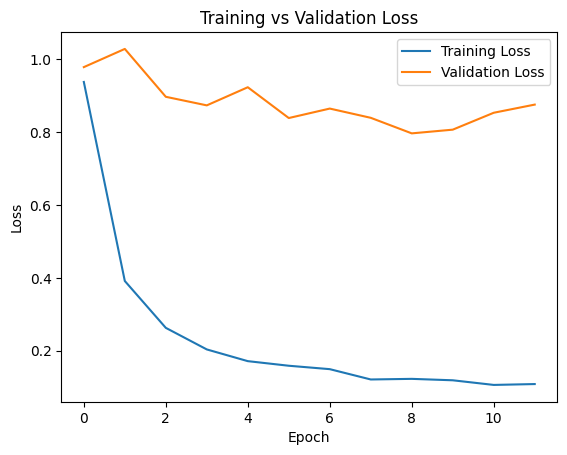

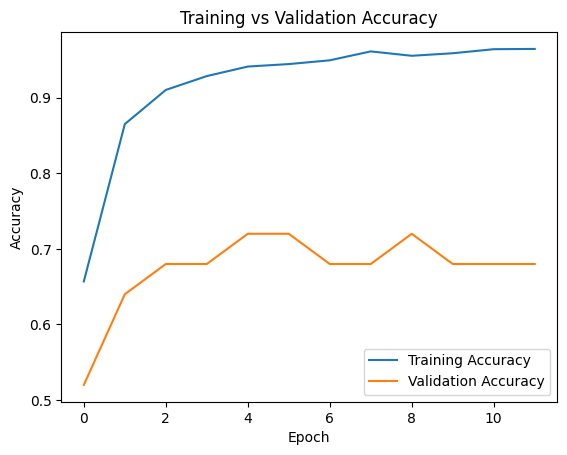

In [ ]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Evaluation3

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model_path = "/content/drive/MyDrive/classifier3.h5"
classifier = load_model(model_path)

# Reset the testing_set  to the beginning+
# Get predictions for the entire test set batch-wise
predictions = []
true_labels = []

for _ in range(testing_set.n // testing_set.batch_size + 1):
    try:
        test_data, test_labels = testing_set.next()
        batch_predictions = classifier.predict(test_data)

        predictions.extend(np.argmax(batch_predictions, axis=1))
        true_labels.extend(np.argmax(test_labels, axis=1))
    except StopIteration:
        break  # Break the loop if the generator is exhausted

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predictions))

1/1 [==============================] - 1s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.82      0.90      0.86        10
           2       0.64      0.90      0.75        10
           3       1.00      0.70      0.82        10
           4       0.86      0.60      0.71        10

    accuracy                           0.82        50
   macro avg       0.85      0.82      0.82        50
weighted avg       0.85      0.82      0.82        50

Confusion Matrix:
[[10  0  0  0  0]
 [ 0  9  1  0  0]
 [ 0  0  9  0  1]
 [ 0  1  2  7  0]
 [ 1  1  2  0  6]]


##Model 4

In [ ]:
# Load the saved model3
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/Banknote_Rec/classifier3.h5"
classifier = load_model(model_path)

In [ ]:
# saved as classifier4.h5
#uncomment to train 4th model
# Import necessary libraries
'''import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np

# Learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.0001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
    return lr

# Load MobileNetV2 model as the base model
MobileNetV2 = tf.keras.applications.MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Create a sequential model
model = models.Sequential()

# Add the MobileNetV2 base model to the sequential model
model.add(base_model)

# Add custom layers on top of MobileNetV2
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation='softmax'))

# Compile the model with a learning rate schedule
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up early stopping and learning rate schedule callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule_callback = LearningRateScheduler(lr_schedule)

# Train the model with early stopping and learning rate schedule
history = model.fit(training_set, epochs=20, validation_data=validation_set, callbacks=[early_stopping, lr_schedule_callback])

# Evaluate the model on the test set
test_results = model.evaluate(testing_set)
print("Test Accuracy:", test_results[1])'''


Epoch 1/20
345/345 [==============================] - 647s 2s/step - loss: 0.7336 - accuracy: 0.7322 - val_loss: 1.0574 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 2/20
345/345 [==============================] - 618s 2s/step - loss: 0.2698 - accuracy: 0.9097 - val_loss: 0.8379 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 3/20
345/345 [==============================] - 619s 2s/step - loss: 0.1822 - accuracy: 0.9404 - val_loss: 0.7852 - val_accuracy: 0.6800 - lr: 1.0000e-04
Epoch 4/20
345/345 [==============================] - 619s 2s/step - loss: 0.1384 - accuracy: 0.9553 - val_loss: 0.7431 - val_accuracy: 0.6800 - lr: 1.0000e-04
Epoch 5/20
345/345 [==============================] - 614s 2s/step - loss: 0.1184 - accuracy: 0.9618 - val_loss: 0.6977 - val_accuracy: 0.7200 - lr: 5.0000e-05
Epoch 6/20
345/345 [==============================] - 628s 2s/step - loss: 0.1072 - accuracy: 0.9661 - val_loss: 0.6405 - val_accuracy: 0.7200 - lr: 5.0000e-05
Epoch 7/20
345/345 [====================

In [ ]:
#saving 3rd model
model.save("/content/drive/MyDrive/Banknote_Rec/classifier4.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/Banknote_Rec/classifier4.h5"
classifier = load_model(model_path)

# Assuming your testing_set is defined
test_results = classifier.evaluate(testing_set)

# The 'test_results' variable will contain the loss and accuracy
test_loss, test_accuracy = test_results

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 4s 479ms/step - loss: 0.6372 - accuracy: 0.8000
Test Loss: 0.637157678604126
Test Accuracy: 0.800000011920929


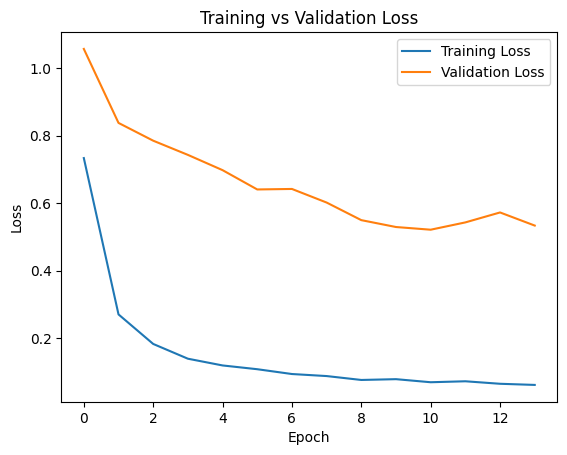

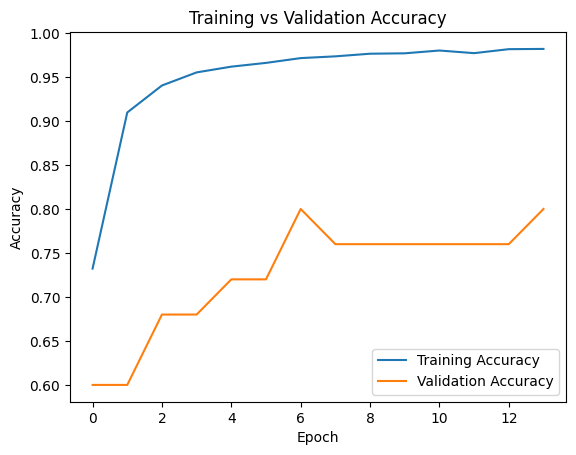

In [ ]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Evaluation4

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model_path = "/content/drive/MyDrive/Banknote_Rec/classifier4.h5"
classifier = load_model(model_path)

# Reset the testing_set  to the beginning
testing_set.reset()

# Get predictions for the entire test set batch-wise
predictions = []
true_labels = []

for _ in range(testing_set.n // testing_set.batch_size + 1):
    try:
        test_data, test_labels = testing_set.next()
        batch_predictions = classifier.predict(test_data)

        predictions.extend(np.argmax(batch_predictions, axis=1))
        true_labels.extend(np.argmax(test_labels, axis=1))
    except StopIteration:
        break  # Break the loop if the generator is exhausted

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predictions))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predictions))

1/1 [==============================] - 1s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.89      0.80      0.84        10
           2       0.69      0.90      0.78        10
           3       0.88      0.70      0.78        10
           4       0.86      0.60      0.71        10

    accuracy                           0.80        50
   macro avg       0.82      0.80      0.80        50
weighted avg       0.82      0.80      0.80        50

Confusion Matrix:
[[10  0  0  0  0]
 [ 0  8  1  1  0]
 [ 0  0  9  0  1]
 [ 0  1  2  7  0]
 [ 3  0  1  0  6]]


# Testing the model on a different denomination notes

##Testing

In [21]:
datagen = ImageDataGenerator()

# Retrieve the class indices from the generator
class_indices = training_set.class_indices

# Invert the dictionary to create ResultMap
ResultMap = {v: k for k, v in class_indices.items()}


1/1 [==============================] - 1s 1s/step
Predicted class label: P10


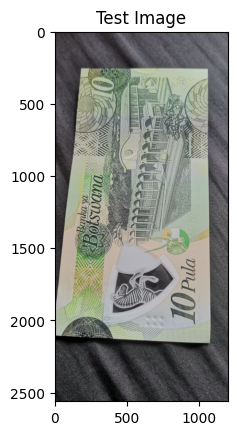

Raw predictions: [[9.9999905e-01 5.0860489e-09 9.7791701e-07 3.1066844e-10 1.2448320e-08]]


In [22]:
#######################################P10 test############################################################

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model_path = "/content/drive/MyDrive/Banknote_Rec/classifier4.h5"
classifier = load_model(model_path)


# Load and preprocess the test image
test_image_path = "/content/drive/MyDrive/Banknote_Rec/split_datasets2/test/p10/P10_50.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make predictions
predictions = classifier.predict(img_array)

# 'ResultMap' is your mapping of class indices to class labels
ResultMap = {0: 'P10', 1: 'P20', 2: 'P200', 3: 'P50', 4: 'P100'}

# Get the predicted class label
predicted_class = ResultMap[np.argmax(predictions)]

# Display the prediction
print("Predicted class label:", predicted_class)

# Display the test image
img = image.load_img(test_image_path)
plt.imshow(img)
plt.title('Test Image')
plt.show()

# Print the raw predictions
print("Raw predictions:", predictions)


1/1 [==============================] - 0s 176ms/step
Predicted class label: P20


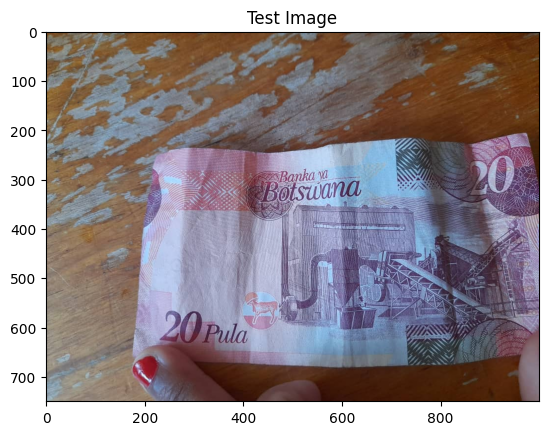

Raw predictions: [[1.6738553e-05 9.9885929e-01 6.0400914e-04 4.8452101e-04 3.5420991e-05]]


In [26]:
#######################################P20 test############################################################

# Load and preprocess the test image
test_image_path = "/content/drive/MyDrive/Banknote_Rec/split_datasets2/test/p20/P20_19.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make predictions
predictions = classifier.predict(img_array)

# 'ResultMap' is your mapping of class indices to class labels
ResultMap = {0: 'P10', 1: 'P20', 2: 'P200', 3: 'P50', 4: 'P100'}

# Get the predicted class label
predicted_class = ResultMap[np.argmax(predictions)]

# Display the prediction
print("Predicted class label:", predicted_class)

# Display the test image
img = image.load_img(test_image_path)
plt.imshow(img)
plt.title('Test Image')
plt.show()

# Print the raw predictions
print("Raw predictions:", predictions)

1/1 [==============================] - 0s 51ms/step
Predicted class label: P50


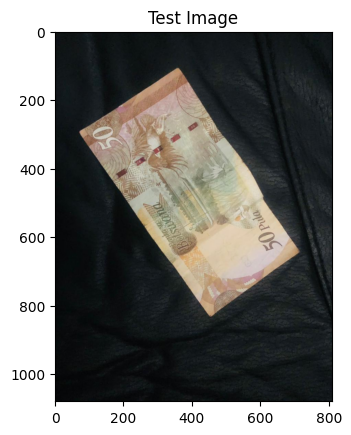

Raw predictions: [[3.1667689e-05 1.4812080e-03 5.2611582e-04 9.9778479e-01 1.7630187e-04]]


In [27]:
#######################################P50 test############################################################
# Load and preprocess the test image
test_image_path = "/content/drive/MyDrive/Banknote_Rec/split_datasets2/test/p50/P50_43.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make predictions
predictions = classifier.predict(img_array)

# 'ResultMap' is your mapping of class indices to class labels
ResultMap = {0: 'P10', 1: 'P20', 2: 'P200', 3: 'P50', 4: 'P100'}

# Get the predicted class label
predicted_class = ResultMap[np.argmax(predictions)]

# Display the prediction
print("Predicted class label:", predicted_class)

# Display the test image
img = image.load_img(test_image_path)
plt.imshow(img)
plt.title('Test Image')
plt.show()

# Print the raw predictions
print("Raw predictions:", predictions)

1/1 [==============================] - 0s 129ms/step
Predicted class label: P100


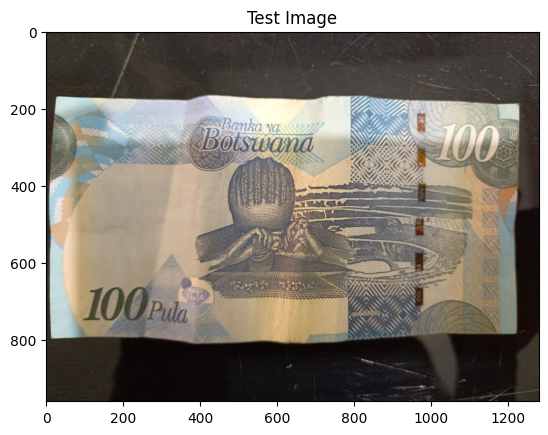

Raw predictions: [[8.1343629e-04 3.9781540e-04 9.4671687e-03 2.0947769e-04 9.8911208e-01]]


In [28]:
#######################################P100 test############################################################

# Load and preprocess the test image
test_image_path = "/content/drive/MyDrive/Banknote_Rec/split_datasets2/test/p100/P100_22.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make predictions
predictions = classifier.predict(img_array)

# 'ResultMap' is your mapping of class indices to class labels
ResultMap = {0: 'P10', 1: 'P20', 2: 'P200', 3: 'P50', 4: 'P100'}

# Get the predicted class label
predicted_class = ResultMap[np.argmax(predictions)]

# Display the prediction
print("Predicted class label:", predicted_class)

# Display the test image
img = image.load_img(test_image_path)
plt.imshow(img)
plt.title('Test Image')
plt.show()

# Print the raw predictions
print("Raw predictions:", predictions)

1/1 [==============================] - 0s 59ms/step
Predicted class label: P200


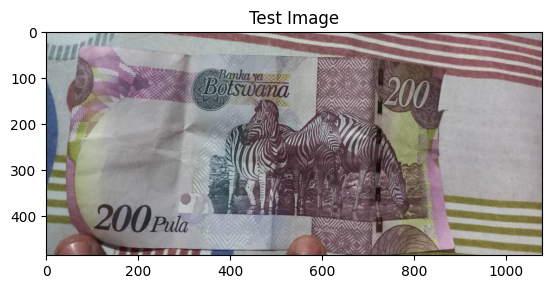

Raw predictions: [[4.6366648e-04 2.5433677e-04 9.9904519e-01 3.8066726e-05 1.9861903e-04]]


In [29]:
#######################################P200 test############################################################
# Load and preprocess the test image
test_image_path = "/content/drive/MyDrive/Banknote_Rec/split_datasets2/test/p200/P200_30.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make predictions
predictions = classifier.predict(img_array)

# 'ResultMap' is your mapping of class indices to class labels
ResultMap = {0: 'P10', 1: 'P20', 2: 'P200', 3: 'P50', 4: 'P100'}

# Get the predicted class label
predicted_class = ResultMap[np.argmax(predictions)]

# Display the prediction
print("Predicted class label:", predicted_class)

# Display the test image
img = image.load_img(test_image_path)
plt.imshow(img)
plt.title('Test Image')
plt.show()

# Print the raw predictions
print("Raw predictions:", predictions)

#Plotting Class Distribution for Each Model

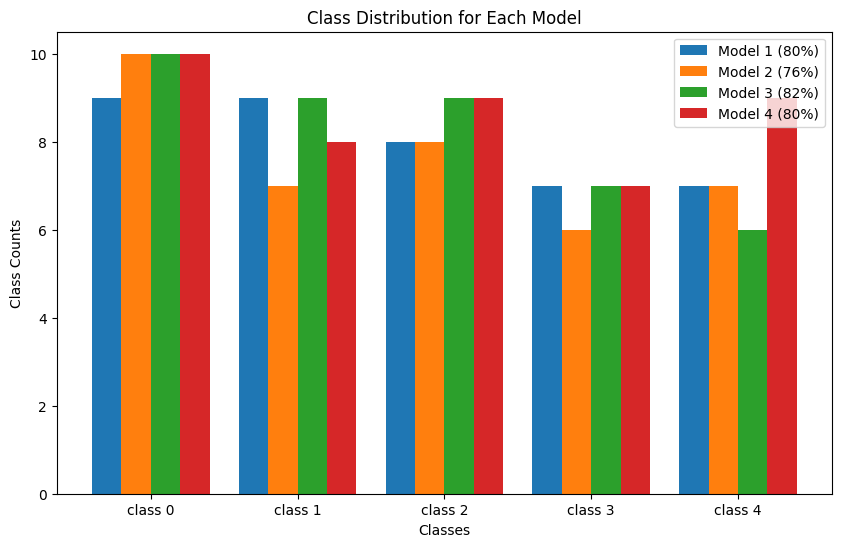

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Model information
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
accuracies = [80, 76, 82, 80]

# Class information for each model
class_counts = [
    {'class 0': 9, 'class 1': 9, 'class 2': 8, 'class 3': 7, 'class 4': 7},
    {'class 0': 10, 'class 1': 7, 'class 2': 8, 'class 3': 6, 'class 4': 7},
    {'class 0': 10, 'class 1': 9, 'class 2': 9, 'class 3': 7, 'class 4': 6},
    {'class 0': 10, 'class 1': 8, 'class 2': 9, 'class 3': 7, 'class 4': 9}
]

# Extract class labels
class_labels = list(class_counts[0].keys())

# Set a larger chart size
plt.figure(figsize=(10, 6))

# Plotting the bar graph
width = 0.2
x = np.arange(len(class_labels))

for i, (model, accuracy, counts) in enumerate(zip(models, accuracies, class_counts)):
    plt.bar(x + i * width, [counts[label] for label in class_labels], width, label=f'{model} ({accuracy}%)')

# Configure plot
plt.xlabel('Classes')
plt.ylabel('Class Counts')
plt.title('Class Distribution for Each Model')
plt.xticks(x + 1.5 * width, class_labels)
plt.legend()
plt.show()
